<a href="https://colab.research.google.com/github/Hemal-Mamtora/lstm-stock-prediction/blob/master/codeshastra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [0]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 68 Mar  1 18:11 kaggle.json
{"username":"hemalmamtora","key":"670b815a744c37f57d9da938e7806622"}

In [0]:
!pip install -q kaggle
!pip install -q kaggle-cli

    100% |████████████████████████████████| 81kB 4.5MB/s 
    100% |████████████████████████████████| 5.3MB 6.0MB/s 
    100% |████████████████████████████████| 92kB 30.4MB/s 
    100% |████████████████████████████████| 51kB 20.6MB/s 


In [0]:
!kaggle datasets download -d abhishekyana/nse-listed-1384-companies-data


 68% 43.0M/62.9M [00:00<00:00, 45.1MB/s]
100% 62.9M/62.9M [00:00<00:00, 92.2MB/s]


In [0]:
!ls


kaggle.json  nse-listed-1384-companies-data.zip  sample_data


In [0]:
!unzip ./nse-listed-1384-companies-data.zip

Archive:  ./nse-listed-1384-companies-data.zip
  inflating: company_symbol_name_dict.d  
  inflating: MARUTI_data.csv         
  inflating: HISTORICAL_DATA.zip     


In [0]:
!ls
!mkdir historical && cd historical
!unzip ./HISTORICAL_DATA.zip



company_symbol_name_dict.d  kaggle.json      nse-listed-1384-companies-data.zip
HISTORICAL_DATA.zip	    MARUTI_data.csv  sample_data
Archive:  ./HISTORICAL_DATA.zip
   creating: HISTORICAL_DATA/
  inflating: HISTORICAL_DATA/PDUMJEPULP_data.csv  
  inflating: HISTORICAL_DATA/ABCIL_data.csv  
  inflating: HISTORICAL_DATA/DQE_data.csv  
  inflating: HISTORICAL_DATA/DEWANHOUS_data.csv  
  inflating: HISTORICAL_DATA/EVERESTIND_data.csv  
  inflating: HISTORICAL_DATA/ASSAMCO_data.csv  
  inflating: HISTORICAL_DATA/SURYAPHARM_data.csv  
  inflating: HISTORICAL_DATA/NOCIL_data.csv  
  inflating: HISTORICAL_DATA/STERTOOLS_data.csv  
  inflating: HISTORICAL_DATA/VARDHACRLC_data.csv  
  inflating: HISTORICAL_DATA/MANINFRA_data.csv  
  inflating: HISTORICAL_DATA/SBIN_data.csv  
  inflating: HISTORICAL_DATA/BLUESTARCO_data.csv  
  inflating: HISTORICAL_DATA/J&KBANK_data.csv  
  inflating: HISTORICAL_DATA/MVLIND_data.csv  
  inflating: HISTORICAL_DATA/SHIV-VANI_data.csv  
  inflating: HISTORICAL_DAT

In [0]:
!ls -la 


total 129300
drwxr-xr-x 1 root root     4096 Mar  1 18:33 .
drwxr-xr-x 1 root root     4096 Mar  1 17:49 ..
-rw-r--r-- 1 root root    73586 Feb 19  2018 company_symbol_name_dict.d
drwxr-xr-x 1 root root     4096 Feb 26 17:33 .config
drwxr-xr-x 2 root root    61440 Feb 18  2018 HISTORICAL_DATA
-rw-r--r-- 1 root root 65976398 Feb 19  2018 HISTORICAL_DATA.zip
-rw-r--r-- 1 root root       68 Mar  1 18:09 kaggle.json
-rw-r--r-- 1 root root   276620 Feb 19  2018 MARUTI_data.csv
-rw-r--r-- 1 root root 65983365 Mar  1 18:20 nse-listed-1384-companies-data.zip
drwxr-xr-x 1 root root     4096 Feb 26 17:33 sample_data


In [0]:
ls -la ./HISTORICAL_DATA

total 240648
drwxr-xr-x 2 root root  61440 Feb 18  2018  ./
drwxr-xr-x 1 root root   4096 Mar  1 18:33  ../
-rw-r--r-- 1 root root 154980 Feb 18  2018  20MICRONS_data.csv
-rw-r--r-- 1 root root 212291 Feb 18  2018  3IINFOTECH_data.csv
-rw-r--r-- 1 root root 290236 Feb 18  2018  3MINDIA_data.csv
-rw-r--r-- 1 root root    123 Feb 18  2018  A2ZMES_data.csv
-rw-r--r-- 1 root root    123 Feb 18  2018  AANJANEYA_data.csv
-rw-r--r-- 1 root root 244336 Feb 18  2018  AARTIDRUGS_data.csv
-rw-r--r-- 1 root root 264654 Feb 18  2018  AARTIIND_data.csv
-rw-r--r-- 1 root root 183346 Feb 18  2018  AARVEEDEN_data.csv
-rw-r--r-- 1 root root 282851 Feb 18  2018  ABAN_data.csv
-rw-r--r-- 1 root root 282345 Feb 18  2018  ABB_data.csv
-rw-r--r-- 1 root root    138 Feb 18  2018  ABCIL_data.csv
-rw-r--r-- 1 root root 191474 Feb 18  2018  ABGSHIP_data.csv
-rw-r--r-- 1 root root    101 Feb 18  2018  ABIRLANUVO_data.csv
-rw-r--r-- 1 root root 293440 Feb 18  2018  ACC_data.csv
-rw-r--r-- 1 root root 190691 Feb 18

In [0]:
import pandas as pd
data2 = pd.read_csv('./MARUTI_data.csv')

In [0]:
import numpy as np

In [0]:
#data = data2.values
#data.shape
#print(data)
#mask = np.ones(data.shape[0], dtype=bool)
#np.array(data.shape[1])
#print(mask)
#p = 0
#for i in data[:, 1:]:
#  for j in i:
#    if np.isnan(j):
#      mask[p] = True
#     break
#    else:
#      mask[p] = False
#  p+=1
  
#print(mask)
      

[['2003-07-09' 164.899994 170.399994 ... 164.300003 151.841385 35164284.0]
 ['2003-07-10' 167.0 168.699997 ... 167.0 154.336624 10464179.0]
 ['2003-07-11' 167.75 174.850006 ... 173.350006 160.205124 11740117.0]
 ...
 ['2018-02-14' 9117.849609 9157.5 ... 9001.599609 9001.599609 357737.0]
 ['2018-02-15' 9049.0 9090.0 ... 9020.25 9020.25 250781.0]
 ['2018-02-16' 9039.900391 9070.0 ... 8836.950195 8836.950195 632659.0]]
[ True  True  True ...  True  True  True]
[False False False ... False False False]


In [0]:
X = np.array(list(data[:, 1:]), dtype=np.float) # took 1 hour bug
mask = ~np.isnan(X).any(axis=1)
X = X[mask] #took 1 hr to find the bug
data = data[mask]
print(X.shape, data.shape)
X = X[:, 3] #working on close
X_train = X[0:3000]
X_test = X[3001:]
X_test.shape

(3616, 6) (3616, 7)


(615,)

In [0]:
X_train = X_train.reshape(-1, 1)
X_train


array([[ 164.300003],
       [ 167.      ],
       [ 173.350006],
       ...,
       [4572.5     ],
       [4549.799805],
       [4634.      ]])

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(X_train)
print(training_set_scaled)

[[0.00000000e+00]
 [6.04066716e-04]
 [2.02474506e-03]
 ...
 [9.86240687e-01]
 [9.81162003e-01]
 [1.00000000e+00]]


In [0]:
X_train = []
y_train = []
for i in range(60, 3000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


In [0]:
# Initialising the RNN
regressor = Sequential()

In [0]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [0]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [0]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [0]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
2940/2940 [==============================] - 46s 16ms/step - loss: 0.0069
Epoch 2/100
2940/2940 [==============================] - 41s 14ms/step - loss: 0.0014
Epoch 3/100
2940/2940 [==============================] - 41s 14ms/step - loss: 0.0012
Epoch 4/100
2940/2940 [==============================] - 41s 14ms/step - loss: 9.3816e-04
Epoch 5/100
2940/2940 [==============================] - 41s 14ms/step - loss: 0.0011
Epoch 6/100
2940/2940 [==============================] - 41s 14ms/step - loss: 0.0011
Epoch 7/100
2940/2940 [==============================] - 41s 14ms/step - loss: 0.0012
Epoch 8/100
2940/2940 [==============================] - 41s 14ms/step - loss: 0.0011
Epoch 9/100
2940/2940 [==============================] - 41s 14ms/step - loss: 9.6534e-04
Epoch 10/100
2940/2940 [==============================] - 41s 14ms/step - loss: 8.3409e-04
Epoch 11/100
2940/2940 [==============================] - 41s 14ms/step - loss:

In [0]:
import pickle
filename = 'hundred_epochs.pkl'
pickle.dump(regressor, open(filename, 'wb'))


In [0]:
files.download(filename)

In [0]:
reg = pickle.load(open(filename, 'rb'))

In [0]:
X_t = X_test.reshape((-1, 1))
print(X_t.shape)
var = X.reshape((-1, 1))
print(var.shape)
#np.concatenate((X_train, X_test.reshape(-1, 1)), axis = 0) 
inputs = sc.transform(var)

X_test = []
for i in range(60, 3616):
    X_test.append(inputs[i-60:i, 0])


(198960, 1)
(3616, 1)


In [0]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt


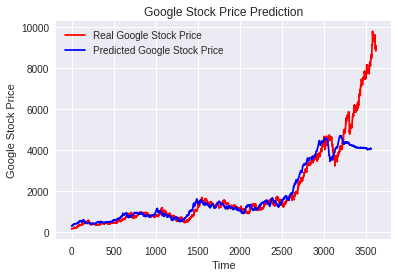

In [0]:
real_stock_price = X
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [0]:
#overfitting
!cd / && ls

bin   content  dev  home  lib32  media	opt   root  sbin  swift  tmp	usr
boot  datalab  etc  lib   lib64  mnt	proc  run   srv   sys	 tools	var


In [0]:
! cd ~/./kaggle

/bin/bash: line 0: cd: /root/./kaggle: No such file or directory
